In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

K-Means Clustering is an iterative algorithm used to partition a dataset into k clusters. 
It aims to minimize the within-cluster sum of squares, where each cluster is represented by its centroid (the mean value of the data points in the cluster). 
The algorithm alternates between assigning data points to the nearest centroid and updating the centroids until convergence, usually defined by a maximum number of iterations or a small change in the centroid positions.

In [2]:
def kmeans_clustering(dataset, k, max_iterations=100):
    # Randomly initialize centroids
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]

    # Initialize cluster assignments
    clusters = np.zeros(dataset.shape[0])

    # Iterate until convergence or max iterations reached
    for _ in range(max_iterations):
        # Assign each point to the nearest centroid
        for i, point in enumerate(dataset):
            distances = np.linalg.norm(point - centroids, axis=1)
            clusters[i] = np.argmin(distances)

        # Update centroids
        for j in range(k):
            centroids[j] = np.mean(dataset[clusters == j], axis=0)

    return clusters.astype(int), centroids

1. centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]: This line initializes the centroids randomly by selecting k data points from the dataset without replacement. The centroids are represented as numpy arrays.

2. clusters = np.zeros(dataset.shape[0]): This line initializes the cluster assignments for each data point in the dataset. Initially, all data points are assigned to cluster 0.

3. The following loop iterates until convergence or the maximum number of iterations (max_iterations) is reached:

a. For each data point in the dataset, the code calculates the Euclidean distance between the data point and each centroid using np.linalg.norm(point - centroids, axis=1). The distances are stored in the distances array.

b. The code assigns each data point to the nearest centroid by finding the index of the centroid with the minimum distance (np.argmin(distances)) and updates the cluster assignment for that data point (clusters[i] = np.argmin(distances)).

c. After assigning all data points to the nearest centroids, the code updates the centroids by calculating the mean of the data points belonging to each cluster using np.mean(dataset[clusters == j], axis=0) and assigns the new centroid values to centroids[j].

4. Finally, the function returns the cluster assignments (clusters) and the centroids (centroids).

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used for exploratory data analysis and feature extraction. It aims to transform a high-dimensional dataset into a lower-dimensional space while retaining most of the information present in the original data.

PCA achieves this by finding a new set of orthogonal axes, called principal components, that capture the maximum variance in the data. The first principal component explains the most variance, followed by the second principal component, and so on. By projecting the data onto the principal components, we obtain a lower-dimensional representation of the data that preserves the most important information.



In [3]:
def pca(dataset):
    # Compute the covariance matrix
    cov_matrix = np.cov(dataset.T)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Project the dataset onto the eigenvectors
    transformed_dataset = np.dot(dataset, eigenvectors)

    return transformed_dataset, eigenvalues, eigenvectors

1. cov_matrix = np.cov(dataset.T): This line computes the covariance matrix of the dataset. The covariance matrix captures the relationships between the different features (columns) of the dataset. The np.cov function takes the transpose of the dataset (dataset.T) to ensure that each row represents a variable (feature), and each column represents an observation.

2. eigenvalues, eigenvectors = np.linalg.eig(cov_matrix): This line computes the eigenvalues and eigenvectors of the covariance matrix. The np.linalg.eig function calculates the eigenvalues and eigenvectors of a square matrix. The eigenvalues represent the amount of variance explained by each eigenvector.

3. sorted_indices = np.argsort(eigenvalues)[::-1]: This line sorts the eigenvalues in descending order and returns the indices that would sort the array. The np.argsort function returns an array of indices that would sort the input array. By reversing the order with [::-1], we obtain the indices in descending order.

4. eigenvalues = eigenvalues[sorted_indices] and eigenvectors = eigenvectors[:, sorted_indices]: These lines sort the eigenvalues and corresponding eigenvectors based on the sorted indices obtained in the previous step. This ensures that the eigenvectors are arranged in the same order as the corresponding eigenvalues.

5. transformed_dataset = np.dot(dataset, eigenvectors): This line projects the dataset onto the eigenvectors. The dot product (np.dot) of the dataset and the eigenvectors performs the projection operation. The resulting transformed_dataset represents the dataset in the new coordinate system defined by the eigenvectors (principal components).

6. Finally, the function returns the transformed dataset (transformed_dataset), the eigenvalues (eigenvalues), and the eigenvectors (eigenvectors).

In [9]:
# Load the dataset
dataset = pd.read_csv("Iris Dataset.csv")

# Store the "Species" column for future comparison
species = dataset["Species"]

# Remove the "Species" column from the dataset
dataset = dataset.drop("Species", axis=1)


Load the dataset and remove the "Species" column from the dataset

In [10]:
# Data preprocessing: Mean normalization
dataset = (dataset - dataset.mean()) / dataset.std()

# Data preprocessing: Feature scaling
dataset = (dataset - dataset.min()) / (dataset.max() - dataset.min())

# Convert the preprocessed dataset to numpy array
dataset = dataset.to_numpy()

Data Preprocessing Steps:

1. Mean normalization: Subtract the mean of each feature from the dataset and divide by the standard deviation ((dataset - dataset.mean()) / dataset.std()). 
This step centers the data around zero and scales the features by their standard deviation.

2. Feature scaling: Scale each feature to the range of 0 to 1 by subtracting the minimum value and dividing by the range ((dataset - dataset.min()) / (dataset.max() - dataset.min())). 
This step ensures that all features have a similar numerical scale.

After preprocessing the data, I converted the preprocessed dataset to a NumPy array for further processing.


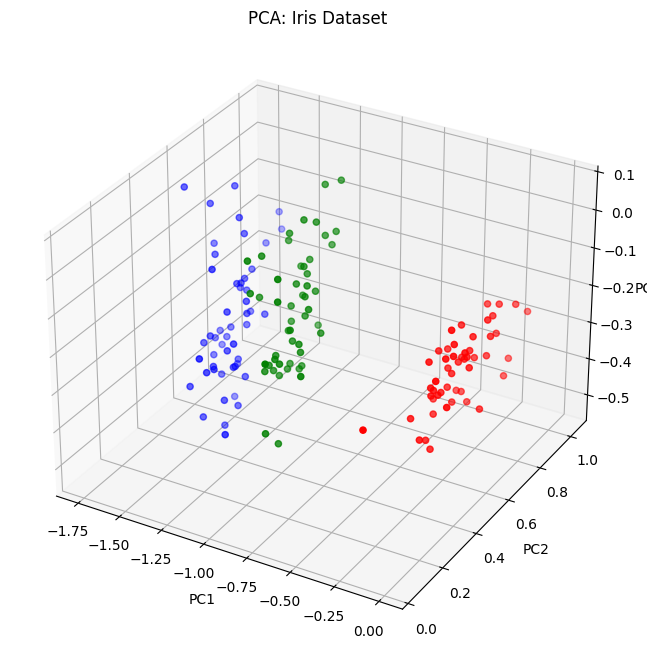

Eigenvalues:
Eigenvalue 1: 0.3037
Eigenvalue 2: 0.0332
Eigenvalue 3: 0.0153
Eigenvalue 4: 0.0072
Eigenvalue 5: 0.0018


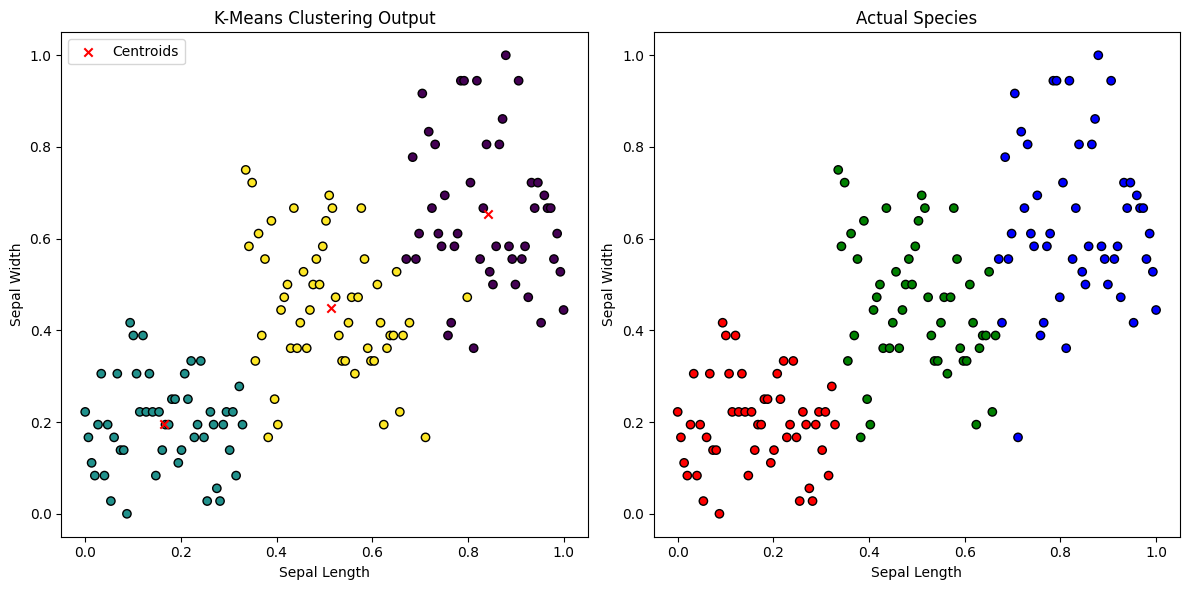

In [12]:
# Perform PCA
transformed_dataset, eigenvalues, eigenvectors = pca(dataset)

# Plot the data in the first three eigenvectors
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    transformed_dataset[:, 0],
    transformed_dataset[:, 1],
    transformed_dataset[:, 2],
    c=species.map({"Iris-setosa": "r", "Iris-versicolor": "g", "Iris-virginica": "b"}),
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA: Iris Dataset")
plt.show()

# Print the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i + 1}: {eigenvalue:.4f}")

# Perform K-Means Clustering
k = 3  # Number of clusters
clusters, centroids = kmeans_clustering(dataset, k)

# Plot the K-Means Clustering output
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot K-Means Clustering output
ax[0].scatter(
    dataset[:, 0],
    dataset[:, 1],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
)
ax[0].scatter(
    centroids[:, 0],
    centroids[:, 1],
    c="r",
    marker="x",
    label="Centroids",
)
ax[0].set_xlabel("Sepal Length")
ax[0].set_ylabel("Sepal Width")
ax[0].set_title("K-Means Clustering Output")
ax[0].legend()

# Plot actual species
ax[1].scatter(
    dataset[:, 0],
    dataset[:, 1],
    c=species.map({"Iris-setosa": "r", "Iris-versicolor": "g", "Iris-virginica": "b"}),
    edgecolor="k",
)
ax[1].set_xlabel("Sepal Length")
ax[1].set_ylabel("Sepal Width")
ax[1].set_title("Actual Species")

plt.tight_layout()
plt.show()